/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,633 (162.63 KB)

 Trainable params: 41,633 (162.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2311 - val_loss: 0.4103
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0186 - val_loss: 0.3633
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0143 - val_loss: 0.2573
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0116 - val_loss: 0.0860
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0100 - val_loss: 0.0630
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0101 - val_loss: 0.0605
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0098 - val_loss: 0.0813
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0088 - val_loss: 0.0658
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0092 - val_loss: 0.0551
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0083 - val_loss: 0.0561
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0079 - val_loss: 0.0512
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0

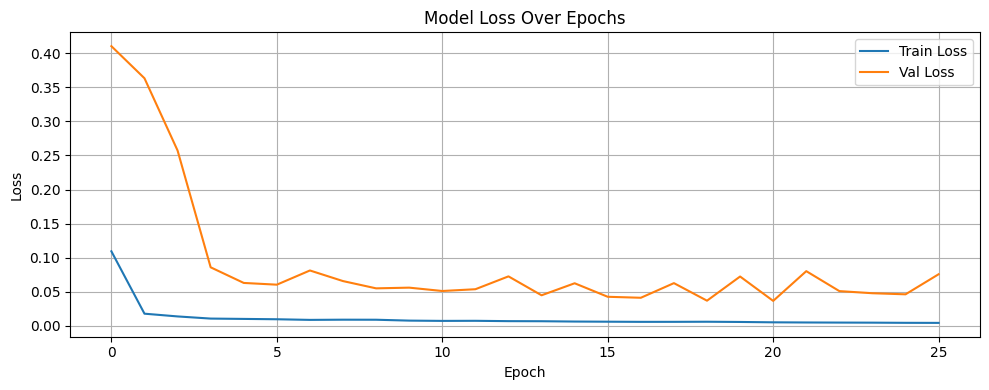

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


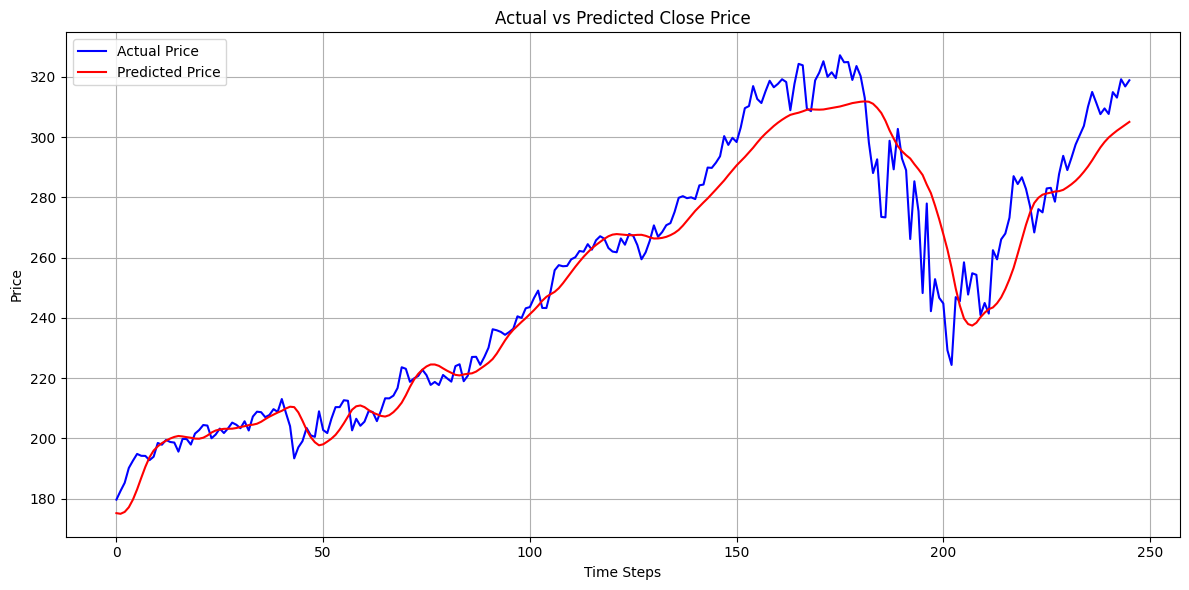

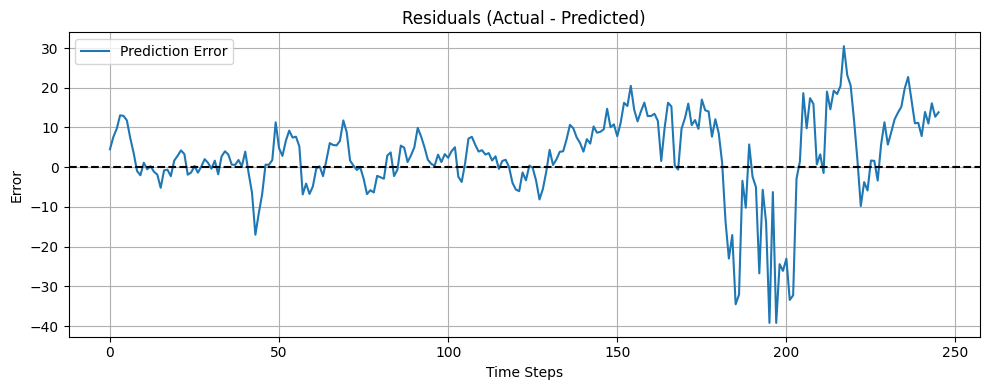


 Model Evaluation Metrics:
MAE (Mean Absolute Error):      7.8611
RMSE (Root Mean Squared Error): 10.8866
R² Score (Coefficient of Determination): 0.9334


In [5]:
#  Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load Dataset
df = pd.read_csv('/content/Apple Stock data.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Use 'close' price only
data = df[['close']]

# Standardize Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Create Sequences
seq_len = 30
X, y = [], []

for i in range(seq_len, len(scaled_data)):
    X.append(scaled_data[i - seq_len:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

#  Train/Test Split
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# LSTM Model
model = Sequential([
    LSTM(32, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(64, return_sequences=True),

    LSTM(32),
    Dense(1)
])

model.compile(optimizer=Adam(0.001), loss='mean_squared_error')
model.summary()
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history =model.fit(X_train, y_train, epochs=50, batch_size=32,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

#  Train
 #model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),verbose=1)

# Training & Validation Loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Prediction on Test Data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

#  Plot Predicted vs Actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plot Residuals
residuals = y_test_actual.flatten() - predictions.flatten()
plt.figure(figsize=(10, 4))
plt.plot(residuals, label='Prediction Error')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Time Steps')
plt.ylabel('Error')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#  Evaluation Metrics
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
r2 = r2_score(y_test_actual, predictions)

print(f"\n Model Evaluation Metrics:")
print(f"MAE (Mean Absolute Error):      {mae:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"R² Score (Coefficient of Determination): {r2:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


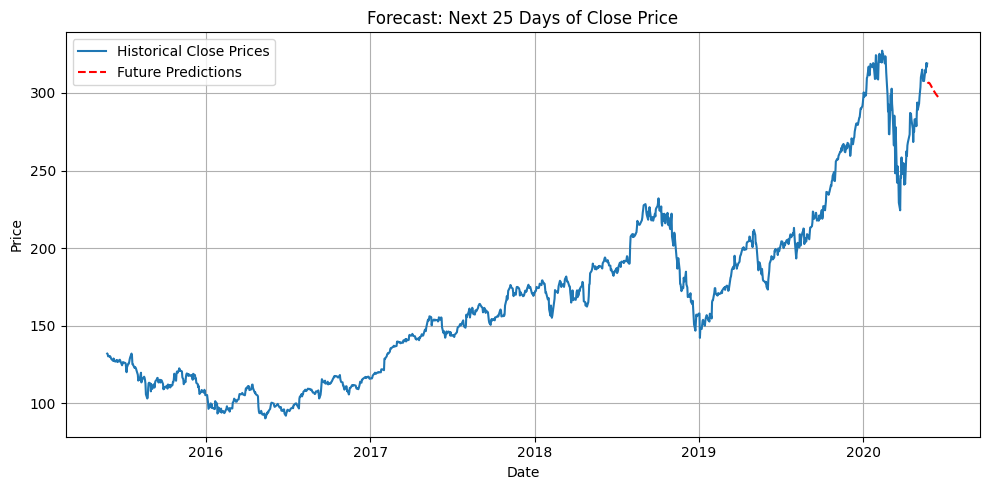

In [6]:
# 🔮 Predict Next 25 Days
future_days = 25
future_predictions = []

# 🧩 Start with last 30-day sequence
last_30_days = scaled_data[-30:].reshape(1, 30, 1)

for _ in range(future_days):
    next_pred = model.predict(last_30_days)[0][0]
    future_predictions.append(next_pred)

    # Update the sequence: remove first, add new prediction
    next_input = np.append(last_30_days[0, 1:], [[next_pred]], axis=0)
    last_30_days = next_input.reshape(1, 30, 1)

# 🔄 Inverse scale to get actual prices
future_predictions_actual = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# 📆 Generate future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

# 📈 Plot
plt.figure(figsize=(10, 5))
plt.plot(df['close'], label='Historical Close Prices')
plt.plot(future_dates, future_predictions_actual, label='Future Predictions', linestyle='--', color='red')
plt.title('Forecast: Next 25 Days of Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
